<a href="https://colab.research.google.com/github/thisisatharva/GANS/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape, LeakyReLU, Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
HEIGHT = 28
WIDTH = 28
CH = 1

IMG_SHAPE = (HEIGHT, WIDTH, CH)
Z_DIM = 100

# Generator

In [17]:
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256*7*7, input_dim=z_dim))
    model.add(Reshape((7,7,256)))
    
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))
    model.add(Activation('tanh'))

    return model

# Discriminator 

In [4]:
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

# Building and Training GAN

In [18]:
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)

    return model

In [24]:
discriminator = build_discriminator(IMG_SHAPE)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

generator = build_generator(Z_DIM)
discriminator.trainable=False

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [25]:
def train(iterations, batch_size, sample_interval):
    (X_train, _), (_, _) = mnist.load_data()

    X_train = X_train/127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0,1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0,1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration + 1, d_loss, 100.0 * accuracy, g_loss))
            sample_images(generator)

In [26]:
def sample_images(generator, rows=4, columns=4):
    z = np.random.normal(0, 1, (rows*columns, Z_DIM))
    gen_imgs = generator.predict(z)

    gen_imgs = 0.5*gen_imgs + 0.5                      #rescale to [0,1]
    fig, axs = plt.subplots(rows, columns, sharey=True, sharex=True)

    cnt=0
    for i in range(rows):
        for j in range(columns):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0])
            axs[i,j].axis('off')
            cnt+=1

1000 [D loss: 0.030934, acc.: 100.00%] [G loss: 1.703924]
2000 [D loss: 0.030935, acc.: 100.00%] [G loss: 5.542639]
3000 [D loss: 0.104334, acc.: 97.27%] [G loss: 4.038776]
4000 [D loss: 0.104666, acc.: 98.05%] [G loss: 3.487043]
5000 [D loss: 0.088359, acc.: 98.44%] [G loss: 4.170695]
6000 [D loss: 0.052220, acc.: 99.22%] [G loss: 5.199821]
7000 [D loss: 0.011387, acc.: 100.00%] [G loss: 9.884091]
8000 [D loss: 0.040189, acc.: 100.00%] [G loss: 4.320167]
9000 [D loss: 0.083822, acc.: 98.05%] [G loss: 6.210833]
10000 [D loss: 0.075959, acc.: 98.05%] [G loss: 4.357170]
11000 [D loss: 0.021363, acc.: 100.00%] [G loss: 5.898849]
12000 [D loss: 0.013539, acc.: 100.00%] [G loss: 4.220754]
13000 [D loss: 0.007891, acc.: 100.00%] [G loss: 7.402356]
14000 [D loss: 0.468016, acc.: 70.70%] [G loss: 2.714029]
15000 [D loss: 0.103717, acc.: 96.48%] [G loss: 5.920153]
16000 [D loss: 0.019244, acc.: 100.00%] [G loss: 3.044774]
17000 [D loss: 0.015043, acc.: 99.61%] [G loss: 6.377166]
18000 [D loss: 

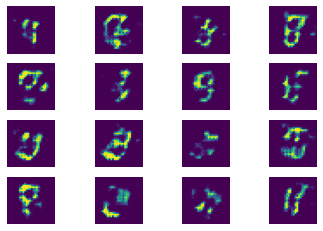

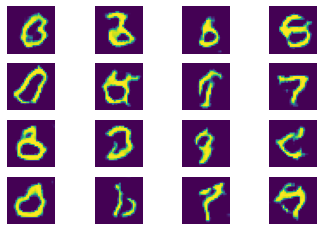

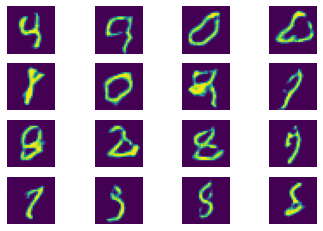

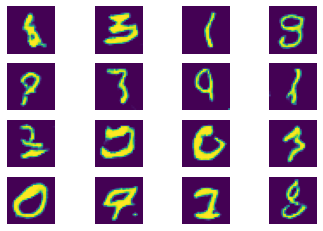

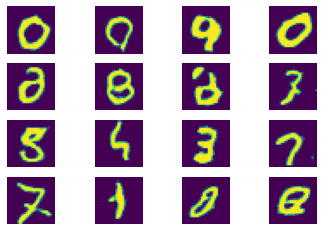

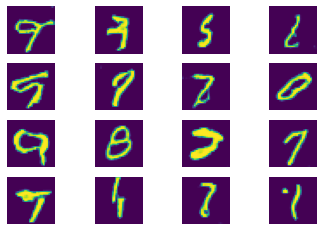

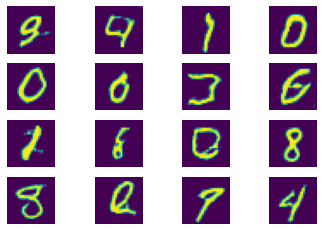

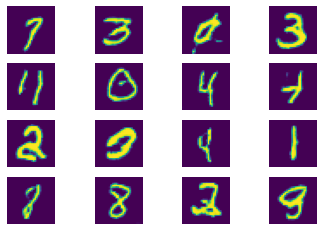

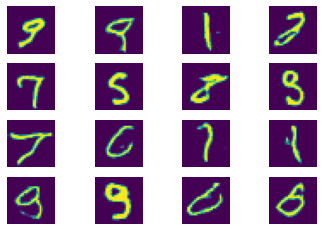

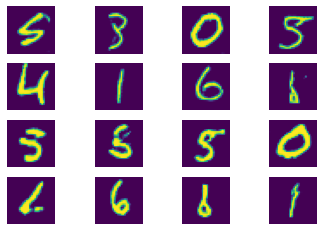

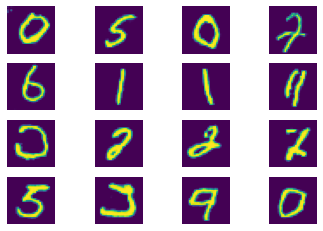

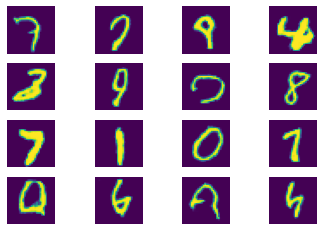

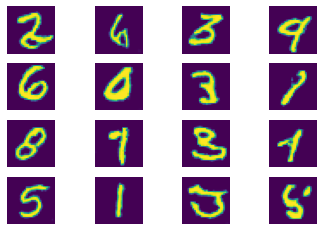

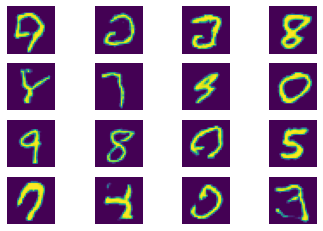

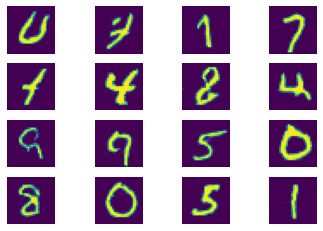

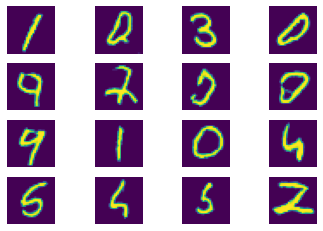

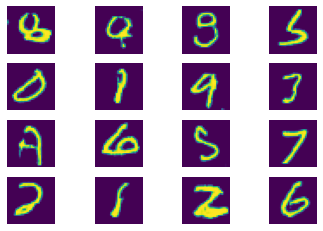

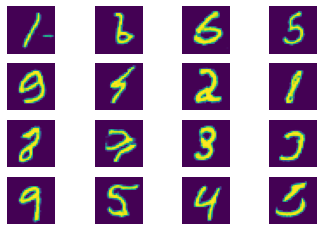

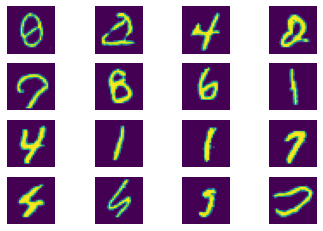

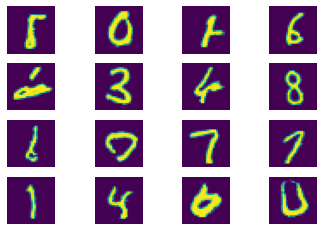

In [27]:
ITR = 20000
BATCH_SIZE = 128
SAMPLE_INTERVAL = 1000

train(ITR, BATCH_SIZE, SAMPLE_INTERVAL)